## Influence of Sex Ratio on World Population Growth

Humans society is composed mainly of males and females, and our society is built around that.
We live in a diverse world, in some cultures the differences between the roles of males and females are worlds apart while in others the difference in roles is near zero.
While it's impossible to quantify something as abstract as cultural roles, lets look at something we can: population.

How does gender ratio affect population growth in any given country?
Is there a difference having more of one sex than the other?
Is one sex more conducive to growth than the other?

We will use data from a 2017 UN population survey of all UN countries to answer our questions. 
This dataset is a mix of surveyed and recorded population values up to the present year and population prediction values in the future years.

First let's set up our coding environment. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from IPython.core.display import HTML
%matplotlib inline

## Importing the Datasets

Now that our coding environment is all set-up, let's import and inspect our data sets. 
We actually have three: one for combined population, female population, and male population.

In [2]:
world_pop = pd.read_csv('C:\Code\Data\pop.csv')
world_pop_f = pd.read_csv('C:\Code\Data\popf.csv')
world_pop_m = pd.read_csv('C:\Code\Data\popm.csv')

Let's start with the basics, just how big are our data sets?

In [3]:
print("Mixed Sex:   ",world_pop.shape)
print("Female Only: ",world_pop_f.shape)
print("Male Only:   ",world_pop_m.shape)

Mixed Sex:    (82719, 4)
Female Only:  (82719, 4)
Male Only:    (82719, 4)


So our data sets are all 82,719 rows by 4 columns. 
Given that they all part of the same UN survey, it is reasonable to assume they have the same format and order if they have the same shape.
We can make sure of that later.
# talk about this when you analyze it

Now we should make sure that there is no null values in the data.

In [4]:
print("Total pop:\n")
print(world_pop.isnull().sum())
print("\nFemale pop:\n")
print(world_pop_f.isnull().sum())
print("\nMale pop:\n")
print(world_pop_m.isnull().sum())

Total pop:

Country or Area    0
Year(s)            0
Variant            0
Value              0
dtype: int64

Female pop:

Country or Area    0
Year(s)            0
Variant            0
Value              0
dtype: int64

Male pop:

Country or Area    0
Year(s)            0
Variant            0
Value              0
dtype: int64


No missing values seen, looks good.
Each data have the same column names, "Country or Area", "Year(s)", "Variant", and "Value".

Let's see what's in each of those columns by looking at the value counts in each.
Since they all came from the same survey, it.
Let's look at the counts for each applicable column in the combined gender data set, starting with the Country or Area column.

In [12]:
print(world_pop["Country or Area"])

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
5        Afghanistan
6        Afghanistan
7        Afghanistan
8        Afghanistan
9        Afghanistan
10       Afghanistan
11       Afghanistan
12       Afghanistan
13       Afghanistan
14       Afghanistan
15       Afghanistan
16       Afghanistan
17       Afghanistan
18       Afghanistan
19       Afghanistan
20       Afghanistan
21       Afghanistan
22       Afghanistan
23       Afghanistan
24       Afghanistan
25       Afghanistan
26       Afghanistan
27       Afghanistan
28       Afghanistan
29       Afghanistan
            ...     
82689       Zimbabwe
82690       Zimbabwe
82691       Zimbabwe
82692       Zimbabwe
82693       Zimbabwe
82694       Zimbabwe
82695       Zimbabwe
82696       Zimbabwe
82697       Zimbabwe
82698       Zimbabwe
82699       Zimbabwe
82700       Zimbabwe
82701       Zimbabwe
82702       Zimbabwe
82703       Zimbabwe
82704       Zimbabwe
82705       Z

So there are 273 countries or areas, all with 303 values. 

# say they are the same but do call the count funtion

Let's look at the variant column.

In [13]:
print(world_pop["Variant"].value_counts())

High      27573
Low       27573
Medium    27573
Name: Variant, dtype: int64


There are three different variants represented here.
As mentioned earlier, all the population values from 2018 onward are predictions.
Each country or area has a population prediction for medium, high, and low, population growth.

Since the values column is expected to differ so greatly, why don't we call the describe function on it.
We can describe all of our data sets side by side, let's set up a function to do so. 

In [14]:
#set-up a function that accepts a list datasets and puts then side by side in the cell
def side_by_side(table_list):
    #Accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

Ok, now we can call describe and look at the results side by side.

In [15]:
pops_describe = [world_pop.describe(),world_pop_f.describe(),world_pop_m.describe()]
display(side_by_side(pops_describe))

,Year(s),Value
count,82719.000000,8.271900e+04
mean,2050.000000,3.026449e+05
std,29.154936,1.180433e+06
min,2000.000000,6.480000e-01
25%,2025.000000,7.910520e+02
50%,2050.000000,9.516296e+03
75%,2075.000000,5.730047e+04
max,2100.000000,1.652124e+07
,Year(s),Value
count,82719.000000,8.271900e+04


In [16]:
low_values = [
    world_pop[world_pop["Value"]<=0.66],
    world_pop_f[world_pop_f["Value"]<=0.35],
    world_pop_m[world_pop_m["Value"]<=0.32]
]
display(side_by_side(low_values))

,Country or Area,Year(s),Variant,Value
31817,Holy See,2100,Low,0.648
31820,Holy See,2099,Low,0.650
31823,Holy See,2098,Low,0.651
31826,Holy See,2097,Low,0.656
31829,Holy See,2096,Low,0.658
31832,Holy See,2095,Low,0.660
31841,Holy See,2092,Low,0.660
,Country or Area,Year(s),Variant,Value
31817,Holy See,2100,Low,0.342
31820,Holy See,2099,Low,0.342


In [17]:
#research holy see

The minimum values are all coming from a place called "Holy See" in its low variant prediction.
It seems that however the different population predictions are can account for very precise uncertainty, like whether or not a single person might be living someplace.

We really have a better sense of our data set now.
But before we go any further, let's look at the first 20 rows of all three data sets side by side to making visual confirmation that they have the same format.

In [18]:
pops_list = [world_pop.head(20),world_pop_f.head(20),world_pop_m.head(20)]


display(side_by_side(pops_list))

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2100,Medium,70409.629
1,Afghanistan,2100,High,105167.028
2,Afghanistan,2100,Low,44841.532
3,Afghanistan,2099,Medium,70604.652
4,Afghanistan,2099,High,104678.263
5,Afghanistan,2099,Low,45387.714
6,Afghanistan,2098,Medium,70793.669
7,Afghanistan,2098,High,104184.165
8,Afghanistan,2098,Low,45933.673
9,Afghanistan,2097,Medium,70975.797


Our three data frames to indeed line up, so we can do more complex work with them.
Before we begin answering our questions about gender, let's see what our data looks like.

## Visualizing the Data Set

Let's visualize our data by graphing it. 
Since we are trying to understand the population differences of different countries, when can start by graphing just that. 
Why not use the most populous? The top 10 most populated countries are, in order: China, India, The United States, Indonesia, Brazil, Pakistan, Nigeria, Bangladesh, The Russian Federation, and Mexico. 

To start, let's create seperate data frames for each country.

In [19]:
china_pop = world_pop[world_pop['Country or Area']=='China']
india_pop = world_pop[world_pop['Country or Area']=='India']
us_pop = world_pop[world_pop['Country or Area']=='United States of America']
indonesia_pop = world_pop[world_pop['Country or Area']=='Indonesia']
brazil_pop = world_pop[world_pop['Country or Area']=='Brazil']
paki_pop = world_pop[world_pop['Country or Area']=='Pakistan']
nigeria_pop = world_pop[world_pop['Country or Area']=='Nigeria']
bang_pop = world_pop[world_pop['Country or Area']=='Bangladesh']
russia_pop = world_pop[world_pop['Country or Area']=='Russian Federation']
mexico_pop = world_pop[world_pop['Country or Area']=='Mexico']

Let's ignore the prediction variants for now, and just graph the mean of medium, high, and low variants values for now.

In [20]:
china_pop_mean = china_pop.groupby('Year(s)')['Value'].mean()
india_pop_mean = india_pop.groupby('Year(s)')['Value'].mean()
us_pop_mean = us_pop.groupby('Year(s)')['Value'].mean()
indonesia_pop_mean = indonesia_pop.groupby('Year(s)')['Value'].mean()
brazil_pop_mean = brazil_pop.groupby('Year(s)')['Value'].mean()
paki_pop_mean = paki_pop.groupby('Year(s)')['Value'].mean()
nigeria_pop_mean = nigeria_pop.groupby('Year(s)')['Value'].mean()
bang_pop_mean = bang_pop.groupby('Year(s)')['Value'].mean()
russia_pop_mean = russia_pop.groupby('Year(s)')['Value'].mean()
mexico_pop_mean = mexico_pop.groupby('Year(s)')['Value'].mean()

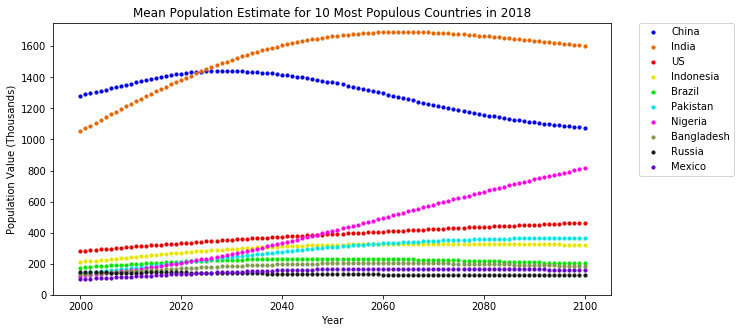

In [21]:
plt.figure(figsize=(10,5))

plt.scatter(x=range(2000,2101), y=china_pop_mean/1000, s=10, color=(0.0,0.0,0.9), label='China')
plt.scatter(x=range(2000,2101), y=india_pop_mean/1000, s=10, color=(0.9,0.4,0.0), label='India')
plt.scatter(x=range(2000,2101), y=us_pop_mean/1000, s=10, color=(0.9,0.0,0.0), label='US')
plt.scatter(x=range(2000,2101), y=indonesia_pop_mean/1000, s=10, color=(0.9,0.9,0.0), label='Indonesia')
plt.scatter(x=range(2000,2101), y=brazil_pop_mean/1000, s=10, color=(0.0,0.9,0.0), label='Brazil')
plt.scatter(x=range(2000,2101), y=paki_pop_mean/1000, s=10, color=(0.0,0.9,0.9), label='Pakistan')
plt.scatter(x=range(2000,2101), y=nigeria_pop_mean/1000, s=10, color=(1,0.0,0.9), label='Nigeria')
plt.scatter(x=range(2000,2101), y=bang_pop_mean/1000, s=10, color=(0.5,0.6,0.3), label='Bangladesh')
plt.scatter(x=range(2000,2101), y=russia_pop_mean/1000, s=10, color=(0.1,0.1,0.1), label='Russia')
plt.scatter(x=range(2000,2101), y=mexico_pop_mean/1000, s=10, color=(0.4,0.0,0.8), label='Mexico')
#we divide the population value by 1000 to put the pop value in thousands and get a cleaner graph


plt.title('Mean Population Estimate for 10 Most Populous Countries in 2018')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.ylim(0,1750)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

While this graph has told us a lot more about our data, it is difficult to discern the changes in each population, since there values are so different. 
China's and India's starting values absolutely dwarf the other starting values and all 10 curves suffer for it. 
Also, even though Nigeria's population starts out in the bottom half, it drastically ballons having the greatest relative increase by a large margin. 
By 2100, it's population is predicted to be closer to China's than China's population is to India's.

Since there seem to be two very different groups of population sizes amoung our 10 countries, let's group them on two different graphs. 
We should not graph Nigeria, as it would warp either graph it was on.

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.scatter(x=range(2000,2101), y=china_pop_mean/1000, s=10, color=(0.0,0.0,0.9), label='China')
plt.scatter(x=range(2000,2101), y=india_pop_mean/1000, s=10, color=(0.9,0.4,0.0), label='India')
plt.title('Mean Population Estimate, Top 2 Most Populous Coutries')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,1,2)
plt.scatter(x=range(2000,2101), y=us_pop_mean/1000, s=10, color=(0.9,0.0,0.0), label='US')
plt.scatter(x=range(2000,2101), y=indonesia_pop_mean/1000, s=10, color=(0.9,0.9,0.0), label='Indonesia')
plt.scatter(x=range(2000,2101), y=brazil_pop_mean/1000, s=10, color=(0.0,0.9,0.0), label='Brazil')
plt.scatter(x=range(2000,2101), y=paki_pop_mean/1000, s=10, color=(0.0,0.9,0.9), label='Pakistan')
plt.scatter(x=range(2000,2101), y=bang_pop_mean/1000, s=10, color=(0.5,0.6,0.3), label='Bangladesh')
plt.scatter(x=range(2000,2101), y=russia_pop_mean/1000, s=10, color=(0.1,0.1,0.1), label='Russia')
plt.scatter(x=range(2000,2101), y=mexico_pop_mean/1000, s=10, color=(0.4,0.0,0.8), label='Mexico')
plt.title('Mean Population Estimate, Top 3rd - 10th Most Populous Countries')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

SyntaxError: invalid syntax (<ipython-input-22-62934c37a3e5>, line 9)

These  two graphs are much more useful than our previous one, and we can really see the trends and differences between the two groups of population sizes.
These are definitely complicated and thought out estimates, each country has its own unique trend.

Most countries on both graphs seem to follow a trend of slowing increase, peaking at some point in the century, then entering a trend of accelerating decrease, with few exceptions.
In fact, this is so common let's call this the __usual__ trend from now on.
In constrast from the usual Pakistan appears to simply peak and stay the same, while the US appears the increase steadily across thoughout the entire century. 
Russia on the other hand looks very different from most other countries, starting in trend of decrease but slowly stabalizing towards the end of the century.

But remember, these graphs only used the mean of all the population prediction variants. 
Let's take a look at what all the prediction variants really look like side by side. Of course, there are 3 predictions for each country. 
To keep our visualization simple, let's just look at the two most populous countries: China and Inida.

We'll initialize data frames for each prediction variant to make things easier.

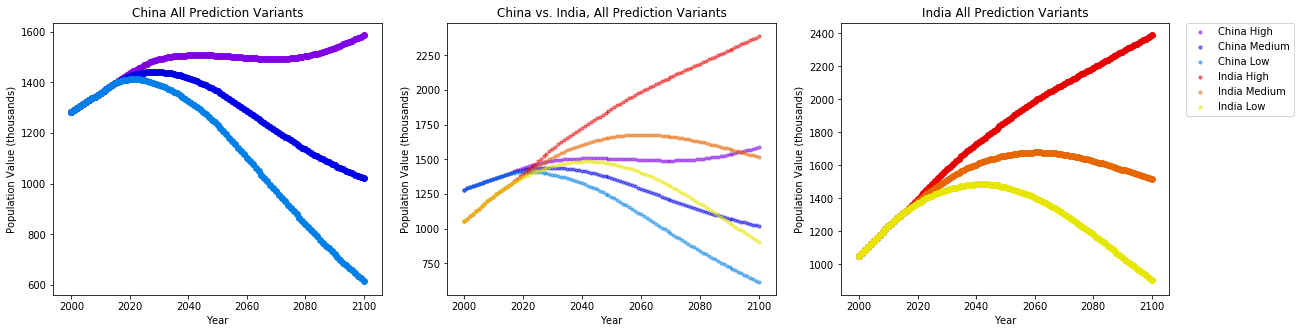

In [23]:
china_pop_med = china_pop[china_pop['Variant']=='Medium']
china_pop_high = china_pop[china_pop['Variant']=='High']
china_pop_low = china_pop[china_pop['Variant']=='Low']

india_pop_med = india_pop[india_pop['Variant']=='Medium']
india_pop_high = india_pop[india_pop['Variant']=='High']
india_pop_low = india_pop[india_pop['Variant']=='Low']

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color=(0.5,0.0,0.9), label='China High') 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color=(0.0,0.0,0.9), label='China Medium') 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color=(0.0,0.5,0.9), label='China Low') 
plt.title('China All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(1,3,2)
plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color=(0.5,0.0,0.9), alpha=0.5, label='China High', s=10) 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color=(0.0,0.0,0.9), alpha=0.5, label='China Medium', s=10) 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color=(0.0,0.5,0.9), alpha=0.5, label='China Low', s=10)
plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color=(0.9,0.0,0.0), alpha=0.5, label='India High', s=10) 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color=(0.9,0.4,0.0), alpha=0.5, label='India Medium', s=10) 
plt.scatter(x=india_pop_low['Year(s)'], y=india_pop_low['Value']/1000,color=(0.9,0.9,0.0), alpha=0.5, label='India Low', s=10) 
plt.title('China vs. India, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(2.25, 1), loc=2, borderaxespad=0.)

plt.subplot(1,3,3)
plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color=(0.9,0.0,0.0), label='India High') 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color=(0.9,0.4,0.0), label='India Medium') 
plt.scatter(x=india_pop_low['Year(s)'], y=india_pop_low['Value']/1000,color=(0.9,0.9,0.0), label='India Low') 
plt.title('India All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.show()

As we can now see, each varaint prediction has a very different curve and trend. 
Note that the values from 2017 and before are the same for all prediction variants, since that data is recorded and not a prediction. 

At the left, we can see China's predictions. 
It's medium and low vairant follow the usual trend, but its high variant is expected to through and enter into a period of increse until the end of the century. 
On the right, we can see India's prediction. 
Similar to China, its medium and low variant perdiction follow the usual curve, but they peak much later, increase much more, and decrease much less. 
But, India's high prediction is completely different, starting and ending in a trend of sharp increase. 
We can really see this in the center graph, where we can compare the two countries' predictions.

China starts with a greater population, has more land, and a larger economy than India. 
What might explain this huge difference in growth? 
Perhaps looking at our data through the lens of sex ratio can tell us more. 

## Sex Differences

Let's start by graphing each of the high, medium, and low variant predictions for females and males.  
To keep things simple, we'll continue to only use China's and India's population values.

To start, we should create 12 seperate data sets for China's and India's different population prediction.

In [24]:
china_pop_f = world_pop_f[world_pop_f['Country or Area']=='China']
china_pop_m = world_pop_m[world_pop_m['Country or Area']=='China']

china_pop_f_high = china_pop_f[china_pop_f['Variant']=='High']
china_pop_m_high = china_pop_m[china_pop_m['Variant']=='High']
china_pop_f_med = china_pop_f[china_pop_f['Variant']=='Medium']
china_pop_m_med = china_pop_m[china_pop_m['Variant']=='Medium']
china_pop_f_low = china_pop_f[china_pop_f['Variant']=='Low']
china_pop_m_low = china_pop_m[china_pop_m['Variant']=='Low']

india_pop_f = world_pop_f[world_pop_f['Country or Area']=='India']
india_pop_m = world_pop_m[world_pop_m['Country or Area']=='India']

india_pop_f_high = india_pop_f[india_pop_f['Variant']=='High']
india_pop_m_high = india_pop_m[india_pop_m['Variant']=='High']
india_pop_f_med = india_pop_f[india_pop_f['Variant']=='Medium']
india_pop_m_med = india_pop_m[india_pop_m['Variant']=='Medium']
india_pop_f_low = india_pop_f[india_pop_f['Variant']=='Low']
india_pop_m_low = india_pop_m[india_pop_m['Variant']=='Low']

Now we'll graph two rows and three columns of graphs. 
The first row will have China's data and the second will have India's.
The first column will contain female population data from all variants, the last column will contain male population data from all the variants, and the middle column will have both to better see the difference.

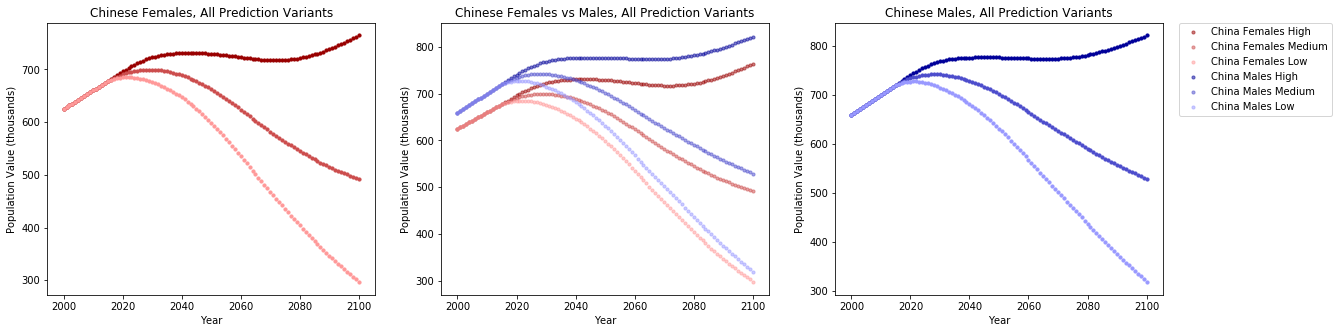

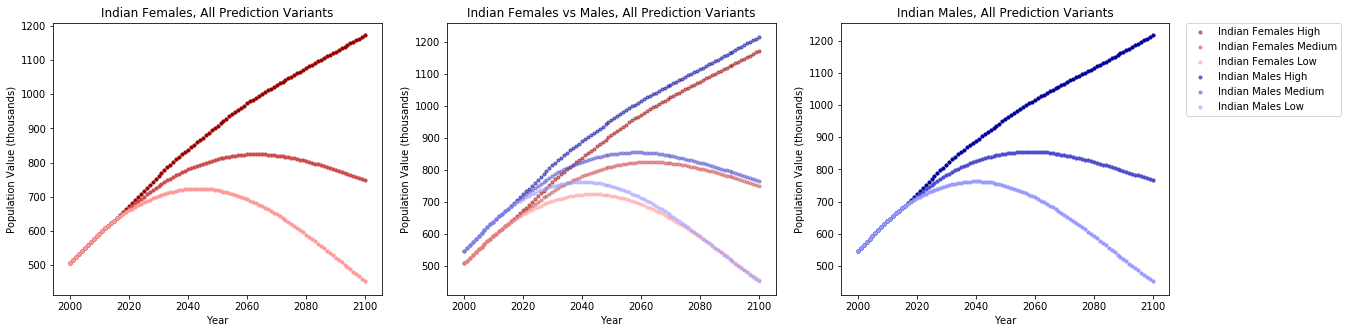

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(x=china_pop_f_high['Year(s)'], y=china_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), label='China Females High', s=10) 
plt.scatter(x=china_pop_f_med['Year(s)'], y=china_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), label='China Females Medium', s=10) 
plt.scatter(x=china_pop_f_low['Year(s)'], y=china_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), label='China Females Low', s=10) 
plt.title('Chinese Females, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(1,3,2)
plt.scatter(x=china_pop_f_high['Year(s)'], y=china_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), alpha=0.5, label='China Females High', s=10) 
plt.scatter(x=china_pop_f_med['Year(s)'], y=china_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), alpha=0.5, label='China Females Medium', s=10) 
plt.scatter(x=china_pop_f_low['Year(s)'], y=china_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), alpha=0.5, label='China Females Low', s=10) 
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), alpha=0.5, label='China Males High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), alpha=0.5, label='China Males Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), alpha=0.5, label='China Males Low', s=10) 
plt.title('Chinese Females vs Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(2.25, 1), loc=2, borderaxespad=0.)

plt.subplot(1,3,3)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), label='China Males High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), label='China Males Medium',s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), label='China Males Low',s=10)
plt.title('Chinese Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.show()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(x=india_pop_f_high['Year(s)'], y=india_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), label='Indian Females High', s=10) 
plt.scatter(x=india_pop_f_med['Year(s)'], y=india_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), label='Indian Females Medium', s=10) 
plt.scatter(x=india_pop_f_low['Year(s)'], y=india_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), label='Indian Females Low', s=10) 
plt.title('Indian Females, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(1,3,2)
plt.scatter(x=india_pop_f_high['Year(s)'], y=india_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), alpha=0.5, label='Indian Females High', s=10) 
plt.scatter(x=india_pop_f_med['Year(s)'], y=india_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), alpha=0.5, label='Indian Females Medium', s=10) 
plt.scatter(x=india_pop_f_low['Year(s)'], y=india_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), alpha=0.5, label='Indian Females Low', s=10) 
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), alpha=0.5, label='Indian Males High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), alpha=0.5, label='Indian Males Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), alpha=0.5, label='Indian Males Low', s=10) 
plt.title('Indian Females vs Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(2.25, 1), loc=2, borderaxespad=0.)

plt.subplot(1,3,3)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), label='Indian Males High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), label='Indian Males Medium',s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), label='Indian Males Low',s=10)
plt.title('Indian Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')


plt.show()

It seems like India has a slgihtly smaller gender difference than China, especially towards the end of the century, but it is hard to tell with the format our data is in. 
We need to find a better way to visualize the difference between both sexes respective population.

## Working with our Data

Let's add another column to our female and male world population data sets, called "Difference." 
This column will contain values equal to the difference between the male and female populations of that particular country, year, and prediction variant. 
In the female data set, the value will be equal to the female population minus the male population, and vice versa in the male data set. 
So this column's sign will change between the 2, but not the absolute value.

In [26]:
world_pop_f['Difference'] = world_pop_f['Value'] - world_pop_m['Value']
world_pop_m['Difference'] = world_pop_m['Value'] - world_pop_f['Value']

Of coure, just looking at the flat difference won't be too usefull when comparing populations of very different sizes. 
Let's create another row, called "Relative Difference." 
This row will contain the value of the difference column divided by the total population value, from the combined sexes population data set.

In [27]:
#graph difference vs population

In [28]:
world_pop_f['Relative Difference'] = world_pop_f['Difference']/world_pop['Value']
world_pop_m['Relative Difference'] = world_pop_m['Difference']/world_pop['Value']

In [29]:
print(world_pop_f.head(5))

  Country or Area  Year(s) Variant      Value  Difference  Relative Difference
0     Afghanistan     2100  Medium  35491.665     573.711             0.008148
1     Afghanistan     2100    High  52560.157     -46.713            -0.000444
2     Afghanistan     2100     Low  22900.482     959.425             0.021396
3     Afghanistan     2099  Medium  35584.042     563.422             0.007980
4     Afghanistan     2099    High  52312.321     -53.626            -0.000512


Perfect, we correctly added the difference and relative difference columns to our data sets. 
Now let's graph the relative difference and see if we notice any trends.
Again, we can use our top 10 most populous countries.

Let's set up data frames for the top 10 most populous countries for both sexes and all prediction variants.
We will set up China's and India's again to ensure that the two new columns we added to our original data frames are there.

In [34]:
china_pop_high = china_pop[china_pop['Variant']=='High']
china_pop_med = china_pop[china_pop['Variant']=='Medium']
china_pop_low = china_pop[china_pop['Variant']=='Low']

india_pop_high = india_pop[india_pop['Variant']=='High']
india_pop_med = india_pop[india_pop['Variant']=='Medium']
india_pop_low = india_pop[india_pop['Variant']=='Low']

us_pop_high = us_pop[us_pop['Variant']=='High']
us_pop_med = us_pop[us_pop['Variant']=='Medium']
us_pop_low = us_pop[us_pop['Variant']=='Low']

indonesia_pop_high = indonesia_pop[indonesia_pop['Variant']=='High']
indonesia_pop_med = indonesia_pop[indonesia_pop['Variant']=='Medium']
indonesia_pop_low = indonesia_pop[indonesia_pop['Variant']=='Low']

brazil_pop_high = brazil_pop[brazil_pop['Variant']=='High']
brazil_pop_med = brazil_pop[brazil_pop['Variant']=='Medium']
brazil_pop_low = brazil_pop[brazil_pop['Variant']=='Low']

nigeria_pop_high = nigeria_pop[nigeria_pop['Variant']=='High']
nigeria_pop_med = nigeria_pop[nigeria_pop['Variant']=='Medium']
nigeria_pop_low = nigeria_pop[nigeria_pop['Variant']=='Low']

paki_pop_high = paki_pop[paki_pop['Variant']=='High']
paki_pop_med = paki_pop[paki_pop['Variant']=='Medium']
paki_pop_low = paki_pop[paki_pop['Variant']=='Low']

bang_pop_high = bang_pop[bang_pop['Variant']=='High']
bang_pop_med = bang_pop[bang_pop['Variant']=='Medium']
bang_pop_low = bang_pop[bang_pop['Variant']=='Low']

russia_pop_high = russia_pop[russia_pop['Variant']=='High']
russia_pop_med = russia_pop[russia_pop['Variant']=='Medium']
russia_pop_low = russia_pop[russia_pop['Variant']=='Low']

mexico_pop_high = mexico_pop[mexico_pop['Variant']=='High']
mexico_pop_med = mexico_pop[mexico_pop['Variant']=='Medium']
mexico_pop_low = mexico_pop[mexico_pop['Variant']=='Low']

In [30]:
#China
china_pop_f = world_pop_f[world_pop_f['Country or Area']=='China']
china_pop_m = world_pop_m[world_pop_m['Country or Area']=='China']

china_pop_f_high = china_pop_f[china_pop_f['Variant']=='High']
china_pop_m_high = china_pop_m[china_pop_m['Variant']=='High']
china_pop_f_med = china_pop_f[china_pop_f['Variant']=='Medium']
china_pop_m_med = china_pop_m[china_pop_m['Variant']=='Medium']
china_pop_f_low = china_pop_f[china_pop_f['Variant']=='Low']
china_pop_m_low = china_pop_m[china_pop_m['Variant']=='Low']

#India
india_pop_f = world_pop_f[world_pop_f['Country or Area']=='India']
india_pop_m = world_pop_m[world_pop_m['Country or Area']=='India']

india_pop_f_high = india_pop_f[india_pop_f['Variant']=='High']
india_pop_m_high = india_pop_m[india_pop_m['Variant']=='High']
india_pop_f_med = india_pop_f[india_pop_f['Variant']=='Medium']
india_pop_m_med = india_pop_m[india_pop_m['Variant']=='Medium']
india_pop_f_low = india_pop_f[india_pop_f['Variant']=='Low']
india_pop_m_low = india_pop_m[india_pop_m['Variant']=='Low']

#The United States
us_pop_f = world_pop_f[world_pop_f['Country or Area']=='United States of America']
us_pop_m = world_pop_m[world_pop_m['Country or Area']=='United States of America']

us_pop_f_high = us_pop_f[us_pop_f['Variant']=='High']
us_pop_m_high = us_pop_m[us_pop_m['Variant']=='High']
us_pop_f_med = us_pop_f[us_pop_f['Variant']=='Medium']
us_pop_m_med = us_pop_m[us_pop_m['Variant']=='Medium']
us_pop_f_low = us_pop_f[us_pop_f['Variant']=='Low']
us_pop_m_low = us_pop_m[us_pop_m['Variant']=='Low']

#Indonesia
indonesia_pop_f = world_pop_f[world_pop_f['Country or Area']=='Indonesia']
indonesia_pop_m = world_pop_m[world_pop_m['Country or Area']=='Indonesia']

indonesia_pop_f_high = indonesia_pop_f[indonesia_pop_f['Variant']=='High']
indonesia_pop_m_high = indonesia_pop_m[indonesia_pop_m['Variant']=='High']
indonesia_pop_f_med = indonesia_pop_f[indonesia_pop_f['Variant']=='Medium']
indonesia_pop_m_med = indonesia_pop_m[indonesia_pop_m['Variant']=='Medium']
indonesia_pop_f_low = indonesia_pop_f[indonesia_pop_f['Variant']=='Low']
indonesia_pop_m_low = indonesia_pop_m[indonesia_pop_m['Variant']=='Low']

#Brazil
brazil_pop_f = world_pop_f[world_pop_f['Country or Area']=='Brazil']
brazil_pop_m = world_pop_m[world_pop_m['Country or Area']=='Brazil']

brazil_pop_f_high = brazil_pop_f[brazil_pop_f['Variant']=='High']
brazil_pop_m_high = brazil_pop_m[brazil_pop_m['Variant']=='High']
brazil_pop_f_med = brazil_pop_f[brazil_pop_f['Variant']=='Medium']
brazil_pop_m_med = brazil_pop_m[brazil_pop_m['Variant']=='Medium']
brazil_pop_f_low = brazil_pop_f[brazil_pop_f['Variant']=='Low']
brazil_pop_m_low = brazil_pop_m[brazil_pop_m['Variant']=='Low']

#Pakistan
paki_pop_f = world_pop_f[world_pop_f['Country or Area']=='Pakistan']
paki_pop_m = world_pop_m[world_pop_m['Country or Area']=='Pakistan']

paki_pop_f_high = paki_pop_f[paki_pop_f['Variant']=='High']
paki_pop_m_high = paki_pop_m[paki_pop_m['Variant']=='High']
paki_pop_f_med = paki_pop_f[paki_pop_f['Variant']=='Medium']
paki_pop_m_med = paki_pop_m[paki_pop_m['Variant']=='Medium']
paki_pop_f_low = paki_pop_f[paki_pop_f['Variant']=='Low']
paki_pop_m_low = paki_pop_m[paki_pop_m['Variant']=='Low']

#Nigeria
nigeria_pop_f = world_pop_f[world_pop_f['Country or Area']=='Nigeria']
nigeria_pop_m = world_pop_m[world_pop_m['Country or Area']=='Nigeria']

nigeria_pop_f_high = nigeria_pop_f[nigeria_pop_f['Variant']=='High']
nigeria_pop_m_high = nigeria_pop_m[nigeria_pop_m['Variant']=='High']
nigeria_pop_f_med = nigeria_pop_f[nigeria_pop_f['Variant']=='Medium']
nigeria_pop_m_med = nigeria_pop_m[nigeria_pop_m['Variant']=='Medium']
nigeria_pop_f_low = nigeria_pop_f[nigeria_pop_f['Variant']=='Low']
nigeria_pop_m_low = nigeria_pop_m[nigeria_pop_m['Variant']=='Low']

#Bangladesh 
bang_pop_f = world_pop_f[world_pop_f['Country or Area']=='Bangladesh']
bang_pop_m = world_pop_m[world_pop_m['Country or Area']=='Bangladesh']

bang_pop_f_high = bang_pop_f[bang_pop_f['Variant']=='High']
bang_pop_m_high = bang_pop_m[bang_pop_m['Variant']=='High']
bang_pop_f_med = bang_pop_f[bang_pop_f['Variant']=='Medium']
bang_pop_m_med = bang_pop_m[bang_pop_m['Variant']=='Medium']
bang_pop_f_low = bang_pop_f[bang_pop_f['Variant']=='Low']
bang_pop_m_low = bang_pop_m[bang_pop_m['Variant']=='Low']

#The Russian Federation          
russia_pop_f = world_pop_f[world_pop_f['Country or Area']=='Russian Federation']
russia_pop_m = world_pop_m[world_pop_m['Country or Area']=='Russian Federation']

russia_pop_f_high = russia_pop_f[russia_pop_f['Variant']=='High']
russia_pop_m_high = russia_pop_m[russia_pop_m['Variant']=='High']
russia_pop_f_med = russia_pop_f[russia_pop_f['Variant']=='Medium']
russia_pop_m_med = russia_pop_m[russia_pop_m['Variant']=='Medium']
russia_pop_f_low = russia_pop_f[russia_pop_f['Variant']=='Low']
russia_pop_m_low = russia_pop_m[russia_pop_m['Variant']=='Low']

#Mexico  
mexico_pop_f = world_pop_f[world_pop_f['Country or Area']=='Mexico']
mexico_pop_m = world_pop_m[world_pop_m['Country or Area']=='Mexico']

mexico_pop_f_high = mexico_pop_f[mexico_pop_f['Variant']=='High']
mexico_pop_m_high = mexico_pop_m[mexico_pop_m['Variant']=='High']
mexico_pop_f_med = mexico_pop_f[mexico_pop_f['Variant']=='Medium']
mexico_pop_m_med = mexico_pop_m[mexico_pop_m['Variant']=='Medium']
mexico_pop_f_low = mexico_pop_f[mexico_pop_f['Variant']=='Low']
mexico_pop_m_low = mexico_pop_m[mexico_pop_m['Variant']=='Low']

Since we're wanting to compare trends now, let's add some more countries than just the most populous.  
Let's add the top 12 most properous countries, measured by the size of their economies. 
Setting aside countries we already have on the list, this gives us Japan, Germany, the United Kingdom, France, Italy, Cananda, South Korea, and Australia.

In [31]:
#set up data frames for missing top 10 ecomonies, similar to previous data frames
#Japan
japan_pop = world_pop[world_pop['Country or Area']=='Japan']

japan_pop_high = japan_pop[japan_pop['Variant']=='High']
japan_pop_med = japan_pop[japan_pop['Variant']=='Medium']
japan_pop_low = japan_pop[japan_pop['Variant']=='Low']

japan_pop_f = world_pop_f[world_pop_f['Country or Area']=='Japan']
japan_pop_m = world_pop_m[world_pop_m['Country or Area']=='Japan']

japan_pop_f_high = japan_pop_f[japan_pop_f['Variant']=='High']
japan_pop_m_high = japan_pop_m[japan_pop_m['Variant']=='High']
japan_pop_f_med = japan_pop_f[japan_pop_f['Variant']=='Medium']
japan_pop_m_med = japan_pop_m[japan_pop_m['Variant']=='Medium']
japan_pop_f_low = japan_pop_f[japan_pop_f['Variant']=='Low']
japan_pop_m_low = japan_pop_m[japan_pop_m['Variant']=='Low']

#Germany
germany_pop = world_pop[world_pop['Country or Area']=='Germany']

germany_pop_high = germany_pop[germany_pop['Variant']=='High']
germany_pop_med = germany_pop[germany_pop['Variant']=='Medium']
germany_pop_low = germany_pop[germany_pop['Variant']=='Low']

germany_pop_f = world_pop_f[world_pop_f['Country or Area']=='Germany']
germany_pop_m = world_pop_m[world_pop_m['Country or Area']=='Germany']

germany_pop_f_high = germany_pop_f[germany_pop_f['Variant']=='High']
germany_pop_m_high = germany_pop_m[germany_pop_m['Variant']=='High']
germany_pop_f_med = germany_pop_f[germany_pop_f['Variant']=='Medium']
germany_pop_m_med = germany_pop_m[germany_pop_m['Variant']=='Medium']
germany_pop_f_low = germany_pop_f[germany_pop_f['Variant']=='Low']
germany_pop_m_low = germany_pop_m[germany_pop_m['Variant']=='Low']

#United Kingdom
uk_pop = world_pop[world_pop['Country or Area']=='United Kingdom']

uk_pop_high = uk_pop[uk_pop['Variant']=='High']
uk_pop_med = uk_pop[uk_pop['Variant']=='Medium']
uk_pop_low = uk_pop[uk_pop['Variant']=='Low']

uk_pop_f = world_pop_f[world_pop_f['Country or Area']=='United Kingdom']
uk_pop_m = world_pop_m[world_pop_m['Country or Area']=='United Kingdom']

uk_pop_f_high = uk_pop_f[uk_pop_f['Variant']=='High']
uk_pop_m_high = uk_pop_m[uk_pop_m['Variant']=='High']
uk_pop_f_med = uk_pop_f[uk_pop_f['Variant']=='Medium']
uk_pop_m_med = uk_pop_m[uk_pop_m['Variant']=='Medium']
uk_pop_f_low = uk_pop_f[uk_pop_f['Variant']=='Low']
uk_pop_m_low = uk_pop_m[uk_pop_m['Variant']=='Low']

#France
france_pop = world_pop[world_pop['Country or Area']=='France']

france_pop_high = france_pop[france_pop['Variant']=='High']
france_pop_med = france_pop[france_pop['Variant']=='Medium']
france_pop_low = france_pop[france_pop['Variant']=='Low']

france_pop_f = world_pop_f[world_pop_f['Country or Area']=='France']
france_pop_m = world_pop_m[world_pop_m['Country or Area']=='France']

france_pop_f_high = france_pop_f[france_pop_f['Variant']=='High']
france_pop_m_high = france_pop_m[france_pop_m['Variant']=='High']
france_pop_f_med = france_pop_f[france_pop_f['Variant']=='Medium']
france_pop_m_med = france_pop_m[france_pop_m['Variant']=='Medium']
france_pop_f_low = france_pop_f[france_pop_f['Variant']=='Low']
france_pop_m_low = france_pop_m[france_pop_m['Variant']=='Low']

#Italy
italy_pop = world_pop[world_pop['Country or Area']=='Italy']

italy_pop_high = italy_pop[italy_pop['Variant']=='High']
italy_pop_med = italy_pop[italy_pop['Variant']=='Medium']
italy_pop_low = italy_pop[italy_pop['Variant']=='Low']

italy_pop_f = world_pop_f[world_pop_f['Country or Area']=='Italy']
italy_pop_m = world_pop_m[world_pop_m['Country or Area']=='Italy']

italy_pop_f_high = italy_pop_f[italy_pop_f['Variant']=='High']
italy_pop_m_high = italy_pop_m[italy_pop_m['Variant']=='High']
italy_pop_f_med = italy_pop_f[italy_pop_f['Variant']=='Medium']
italy_pop_m_med = italy_pop_m[italy_pop_m['Variant']=='Medium']
italy_pop_f_low = italy_pop_f[italy_pop_f['Variant']=='Low']
italy_pop_m_low = italy_pop_m[italy_pop_m['Variant']=='Low']

#Canada
canada_pop = world_pop[world_pop['Country or Area']=='Canada']

canada_pop_high = canada_pop[canada_pop['Variant']=='High']
canada_pop_med = canada_pop[canada_pop['Variant']=='Medium']
canada_pop_low = canada_pop[canada_pop['Variant']=='Low']

canada_pop_f = world_pop_f[world_pop_f['Country or Area']=='Canada']
canada_pop_m = world_pop_m[world_pop_m['Country or Area']=='Canada']

canada_pop_f_high = canada_pop_f[canada_pop_f['Variant']=='High']
canada_pop_m_high = canada_pop_m[canada_pop_m['Variant']=='High']
canada_pop_f_med = canada_pop_f[canada_pop_f['Variant']=='Medium']
canada_pop_m_med = canada_pop_m[canada_pop_m['Variant']=='Medium']
canada_pop_f_low = canada_pop_f[canada_pop_f['Variant']=='Low']
canada_pop_m_low = canada_pop_m[canada_pop_m['Variant']=='Low']

#South Korea
skorea_pop = world_pop[world_pop['Country or Area']=='Republic of Korea']

skorea_pop_high = skorea_pop[skorea_pop['Variant']=='High']
skorea_pop_med = skorea_pop[skorea_pop['Variant']=='Medium']
skorea_pop_low = skorea_pop[skorea_pop['Variant']=='Low']

skorea_pop_f = world_pop_f[world_pop_f['Country or Area']=='Republic of Korea']
skorea_pop_m = world_pop_m[world_pop_m['Country or Area']=='Republic of Korea']

skorea_pop_f_high = skorea_pop_f[skorea_pop_f['Variant']=='High']
skorea_pop_m_high = skorea_pop_m[skorea_pop_m['Variant']=='High']
skorea_pop_f_med = skorea_pop_f[skorea_pop_f['Variant']=='Medium']
skorea_pop_m_med = skorea_pop_m[skorea_pop_m['Variant']=='Medium']
skorea_pop_f_low = skorea_pop_f[skorea_pop_f['Variant']=='Low']
skorea_pop_m_low = skorea_pop_m[skorea_pop_m['Variant']=='Low']

#Australia
australia_pop = world_pop[world_pop['Country or Area']=='Australia']

australia_pop_high = australia_pop[australia_pop['Variant']=='High']
australia_pop_med = australia_pop[australia_pop['Variant']=='Medium']
australia_pop_low = australia_pop[australia_pop['Variant']=='Low']

australia_pop_f = world_pop_f[world_pop_f['Country or Area']=='Australia']
australia_pop_m = world_pop_m[world_pop_m['Country or Area']=='Australia']

australia_pop_f_high = australia_pop_f[australia_pop_f['Variant']=='High']
australia_pop_m_high = australia_pop_m[australia_pop_m['Variant']=='High']
australia_pop_f_med = australia_pop_f[australia_pop_f['Variant']=='Medium']
australia_pop_m_med = australia_pop_m[australia_pop_m['Variant']=='Medium']
australia_pop_f_low = australia_pop_f[australia_pop_f['Variant']=='Low']
australia_pop_m_low = australia_pop_m[australia_pop_m['Variant']=='Low']

Since the male and female relative difference column values with have the same absolute value but just different signs, we should only plot one of them for visual simplicity. Let's just graph the relative difference from the male population data set.
This means a graphical point of (2000, -3) would be read as: in the year 2000, females outnumbered males by 3% of the total population.
We will also plot horizontal red line at 0, since it is such a pivital number this graph. 
Anything above the red line indicated more males than females, and anything below indicated more females than males.

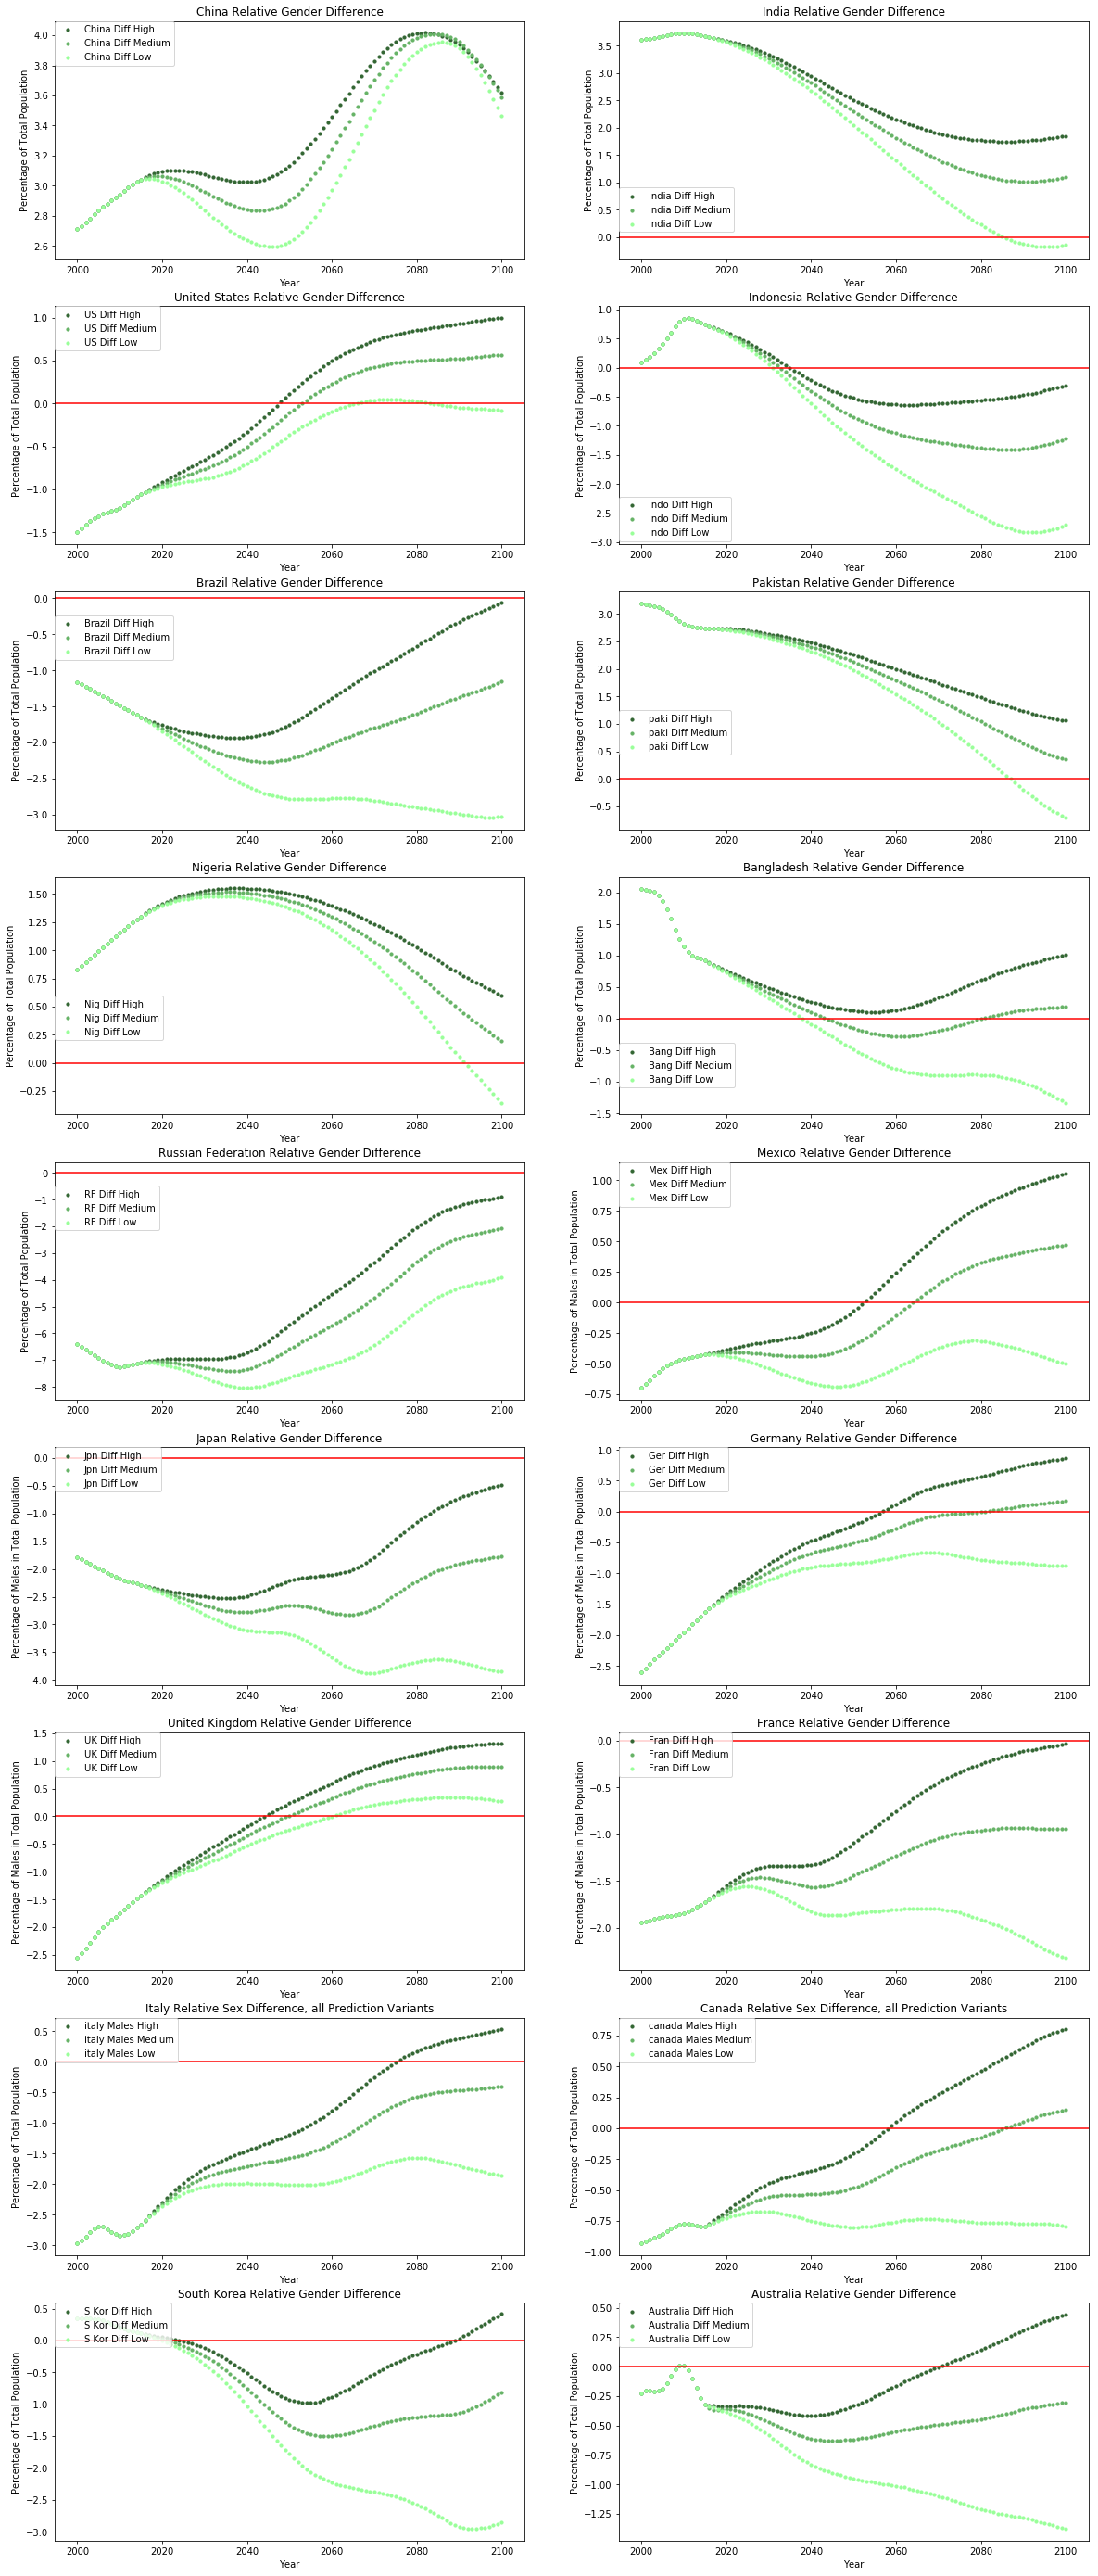

In [33]:
plt.figure(figsize=(20,50))
           
plt.subplot(9,2,1)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='China Diff High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='China Diff Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='China Diff Low', s=10) 
plt.title('China Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
#plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,2)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='India Diff High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='India Diff Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='India Diff Low', s=10) 
plt.title('India Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.3), loc=2, borderaxespad=0.)

plt.subplot(9,2,3)
plt.scatter(x=us_pop_m_high['Year(s)'], y=us_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='US Diff High', s=10) 
plt.scatter(x=us_pop_m_med['Year(s)'], y=us_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='US Diff Medium', s=10) 
plt.scatter(x=us_pop_m_low['Year(s)'], y=us_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='US Diff Low', s=10) 
plt.title('United States Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,4)
plt.scatter(x=indonesia_pop_m_high['Year(s)'], y=indonesia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Indo Diff High', s=10) 
plt.scatter(x=indonesia_pop_m_med['Year(s)'], y=indonesia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Indo Diff Medium', s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Indo Diff Low', s=10) 
plt.title('Indonesia Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.2), loc=2, borderaxespad=0.)

plt.subplot(9,2,5)
plt.scatter(x=brazil_pop_m_high['Year(s)'], y=brazil_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Brazil Diff High', s=10) 
plt.scatter(x=brazil_pop_m_med['Year(s)'], y=brazil_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Brazil Diff Medium', s=10) 
plt.scatter(x=brazil_pop_m_low['Year(s)'], y=brazil_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Brazil Diff Low', s=10) 
plt.title('Brazil Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.9), loc=2, borderaxespad=0.)

plt.subplot(9,2,6)
plt.scatter(x=paki_pop_m_high['Year(s)'], y=paki_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='paki Diff High', s=10) 
plt.scatter(x=paki_pop_m_med['Year(s)'], y=paki_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='paki Diff Medium', s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='paki Diff Low', s=10) 
plt.title('Pakistan Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.5), loc=2, borderaxespad=0.)

plt.subplot(9,2,7)
plt.scatter(x=nigeria_pop_m_high['Year(s)'], y=nigeria_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Nig Diff High', s=10) 
plt.scatter(x=nigeria_pop_m_med['Year(s)'], y=nigeria_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Nig Diff Medium', s=10) 
plt.scatter(x=nigeria_pop_m_low['Year(s)'], y=nigeria_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Nig Diff Low', s=10) 
plt.title('Nigeria Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.5), loc=2, borderaxespad=0.)

plt.subplot(9,2,8)
plt.scatter(x=bang_pop_m_high['Year(s)'], y=bang_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Bang Diff High', s=10) 
plt.scatter(x=bang_pop_m_med['Year(s)'], y=bang_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Bang Diff Medium', s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Bang Diff Low', s=10) 
plt.title('Bangladesh Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.3), loc=2, borderaxespad=0.)

plt.subplot(9,2,9)
plt.scatter(x=russia_pop_m_high['Year(s)'], y=russia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='RF Diff High', s=10) 
plt.scatter(x=russia_pop_m_med['Year(s)'], y=russia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='RF Diff Medium', s=10) 
plt.scatter(x=russia_pop_m_low['Year(s)'], y=russia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='RF Diff Low', s=10) 
plt.title('Russian Federation Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.9), loc=2, borderaxespad=0.)

plt.subplot(9,2,10)
plt.scatter(x=mexico_pop_m_high['Year(s)'], y=mexico_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Mex Diff High', s=10) 
plt.scatter(x=mexico_pop_m_med['Year(s)'], y=mexico_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Mex Diff Medium', s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Mex Diff Low', s=10) 
plt.title('Mexico Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Males in Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,11)
plt.scatter(x=japan_pop_m_high['Year(s)'], y=japan_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Jpn Diff High', s=10) 
plt.scatter(x=japan_pop_m_med['Year(s)'], y=japan_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Jpn Diff Medium', s=10) 
plt.scatter(x=japan_pop_m_low['Year(s)'], y=japan_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Jpn Diff Low', s=10) 
plt.title('Japan Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Males in Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,12)
plt.scatter(x=germany_pop_m_high['Year(s)'], y=germany_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Ger Diff High', s=10) 
plt.scatter(x=germany_pop_m_med['Year(s)'], y=germany_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Ger Diff Medium', s=10) 
plt.scatter(x=germany_pop_m_low['Year(s)'], y=germany_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Ger Diff Low', s=10) 
plt.title('Germany Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Males in Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,13)
plt.scatter(x=uk_pop_m_high['Year(s)'], y=uk_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='UK Diff High', s=10) 
plt.scatter(x=uk_pop_m_med['Year(s)'], y=uk_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='UK Diff Medium', s=10) 
plt.scatter(x=uk_pop_m_low['Year(s)'], y=uk_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='UK Diff Low', s=10) 
plt.title('United Kingdom Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Males in Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,14)
plt.scatter(x=france_pop_m_high['Year(s)'], y=france_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Fran Diff High', s=10) 
plt.scatter(x=france_pop_m_med['Year(s)'], y=france_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Fran Diff Medium', s=10) 
plt.scatter(x=france_pop_m_low['Year(s)'], y=france_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Fran Diff Low', s=10) 
plt.title('France Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Males in Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,15)
plt.scatter(x=italy_pop_m_high['Year(s)'], y=italy_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='italy Males High', s=10) 
plt.scatter(x=italy_pop_m_med['Year(s)'], y=italy_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='italy Males Medium', s=10) 
plt.scatter(x=italy_pop_m_low['Year(s)'], y=italy_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='italy Males Low', s=10) 
plt.title('Italy Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,16)
plt.scatter(x=canada_pop_m_high['Year(s)'], y=canada_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='canada Males High', s=10) 
plt.scatter(x=canada_pop_m_med['Year(s)'], y=canada_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='canada Males Medium', s=10) 
plt.scatter(x=canada_pop_m_low['Year(s)'], y=canada_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='canada Males Low', s=10) 
plt.title('Canada Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,17)
plt.scatter(x=skorea_pop_m_high['Year(s)'], y=skorea_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='S Kor Diff High', s=10) 
plt.scatter(x=skorea_pop_m_med['Year(s)'], y=skorea_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='S Kor Diff Medium', s=10) 
plt.scatter(x=skorea_pop_m_low['Year(s)'], y=skorea_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='S Kor Diff Low', s=10) 
plt.title('South Korea Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,18)
plt.scatter(x=australia_pop_m_high['Year(s)'], y=australia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Australia Diff High', s=10) 
plt.scatter(x=australia_pop_m_med['Year(s)'], y=australia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Australia Diff Medium', s=10) 
plt.scatter(x=australia_pop_m_low['Year(s)'], y=australia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Australia Diff Low', s=10) 
plt.title('Australia Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.show()

Invariably, each country's high variant population prediction has a greater percentage of males to females than any other variant prediction for that country. 
It seems that a higher male ratio is somehow beneficial to population growth, as every high prediction variation has the highest male to female ration and each low prediction variant has the lowest male to female ratio.


Of coure it could also be said, the population is more likely to become more male in periods of increase and more likely to become more female in periods of decrease. 
Perhaps people have more baby males than females during period of population increase.
Though this seems unlikely.

So we've answred at least one of our first questions.
Though we still aren't sure if the gender ratio informs total population growth or if population growth informs gender ratio, we know that a male gender ratio is more associated with growth than female is.


## Sex Difference vs Population Growth

We still aren't sure how exactly sex difference and population growth are related, but they certainly seem to have some sort of relation.
Let's do the simplest test and do a scatter plot for each country of sex difference on the x axis and population value on the y-axis.

Let's plot the actual population curve of each country side by side with the sex difference.
We will make the population for each country different shades of blue and the sex difference different shades of red.

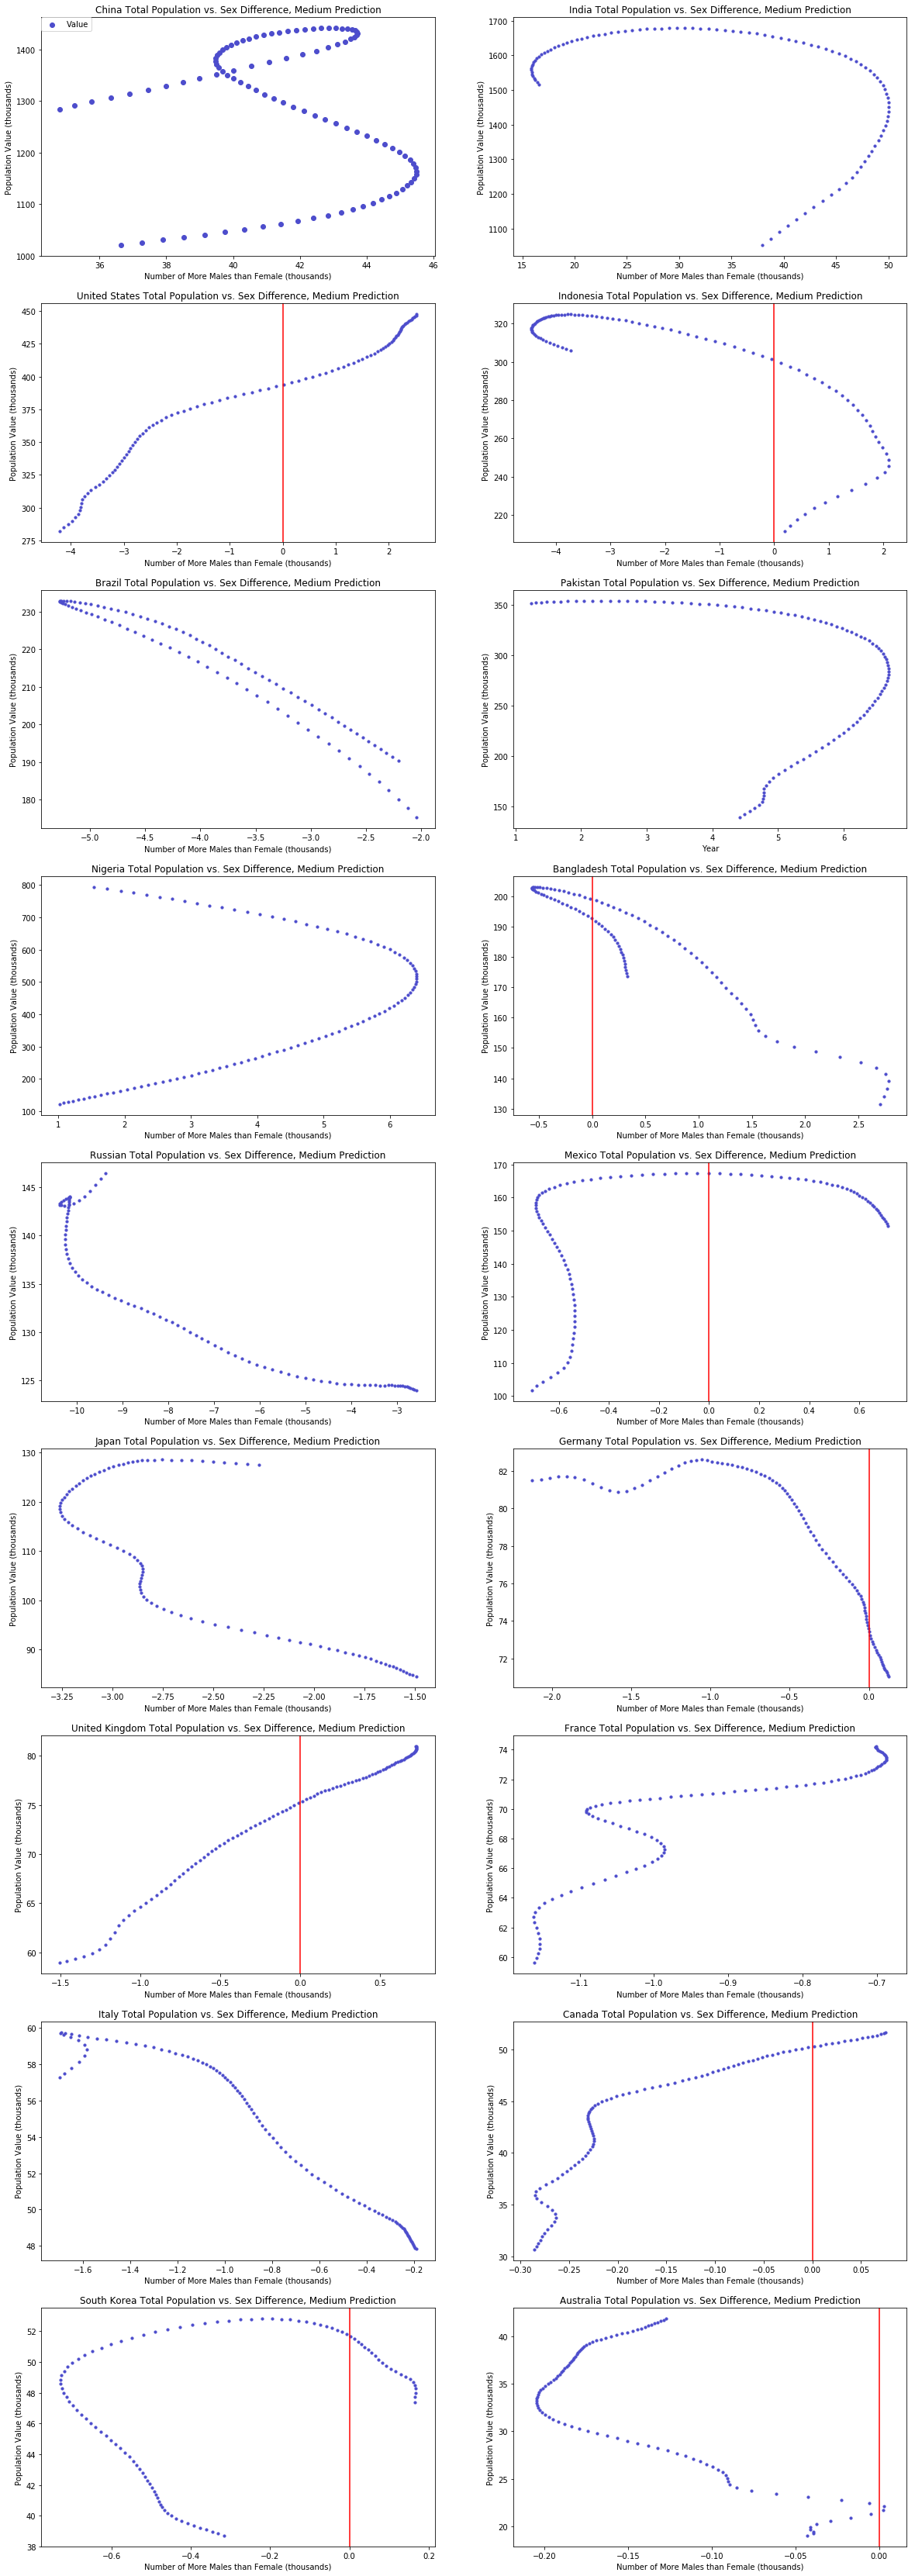

In [40]:
plt.figure(figsize=(20,60))

plt.subplot(9,2,1)
plt.scatter(x=china_pop_m_med['Difference']/1000, y=china_pop_med['Value']/1000,color=(0.3,0.3,0.8)) 
plt.title('China Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(9,2,2)
plt.scatter(x=india_pop_m_med['Difference']/1000, y=india_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('India Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')

plt.subplot(9,2,3)
plt.scatter(x=us_pop_m_med['Difference']/1000, y=us_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('United States Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')

plt.subplot(9,2,4)
plt.scatter(x=indonesia_pop_m_med['Difference']/1000, y=indonesia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Indonesia Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')

plt.subplot(9,2,5)
plt.scatter(x=brazil_pop_m_med['Difference']/1000, y=brazil_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Brazil Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')

plt.subplot(9,2,6)
plt.scatter(x=paki_pop_m_med['Difference']/1000, y=paki_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Pakistan Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(9,2,7)
plt.scatter(x=nigeria_pop_m_med['Difference']/1000, y=nigeria_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Nigeria Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')

plt.subplot(9,2,8)
plt.scatter(x=bang_pop_m_med['Difference']/1000, y=bang_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Bangladesh Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')

plt.subplot(9,2,9)
plt.scatter(x=russia_pop_m_med['Difference']/1000, y=russia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Russian Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')

plt.subplot(9,2,10)
plt.scatter(x=mexico_pop_m_med['Difference']/1000, y=mexico_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Mexico Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')


plt.subplot(9,2,11)
plt.scatter(x=japan_pop_m_med['Difference']/1000, y=japan_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Japan Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
#plt.axvline(x=0, color='r', linestyle='-')


plt.subplot(9,2,12)
plt.scatter(x=germany_pop_m_med['Difference']/1000, y=germany_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Germany Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')


plt.subplot(9,2,13)
plt.scatter(x=uk_pop_m_med['Difference']/1000, y=uk_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('United Kingdom Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')


plt.subplot(9,2,14)
plt.scatter(x=france_pop_m_med['Difference']/1000, y=france_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('France Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
#plt.axvline(x=0, color='r', linestyle='-')


plt.subplot(9,2,15)
plt.scatter(x=italy_pop_m_med['Difference']/1000, y=italy_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Italy Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
#plt.axvline(x=0, color='r', linestyle='-')

plt.subplot(9,2,16)
plt.scatter(x=canada_pop_m_med['Difference']/1000, y=canada_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Canada Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')

plt.subplot(9,2,17)
plt.scatter(x=skorea_pop_m_med['Difference']/1000, y=skorea_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('South Korea Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')

plt.subplot(9,2,18)
plt.scatter(x=australia_pop_m_med['Difference']/1000, y=australia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.title('Australia Total Population vs. Sex Difference, Medium Prediction')
plt.xlabel('Number of More Males than Female (thousands)')
plt.ylabel('Population Value (thousands)')
plt.axvline(x=0, color='r', linestyle='-')

plt.show()

There doesn't doesn't appear to be any consistent trends between all 18 countries.
There doesn't seem to be a direct relationship between sex ratio and population growth, whatever the relation it appears to be more nuanced.
This could make sense, as it stands to reason that the sex ratio difference doesn't affect population growth immidiately, as the new generation causing the change needs time to grow up.

Let's take a closer look at the two, sex difference and population growth, and see if we notice any trends.

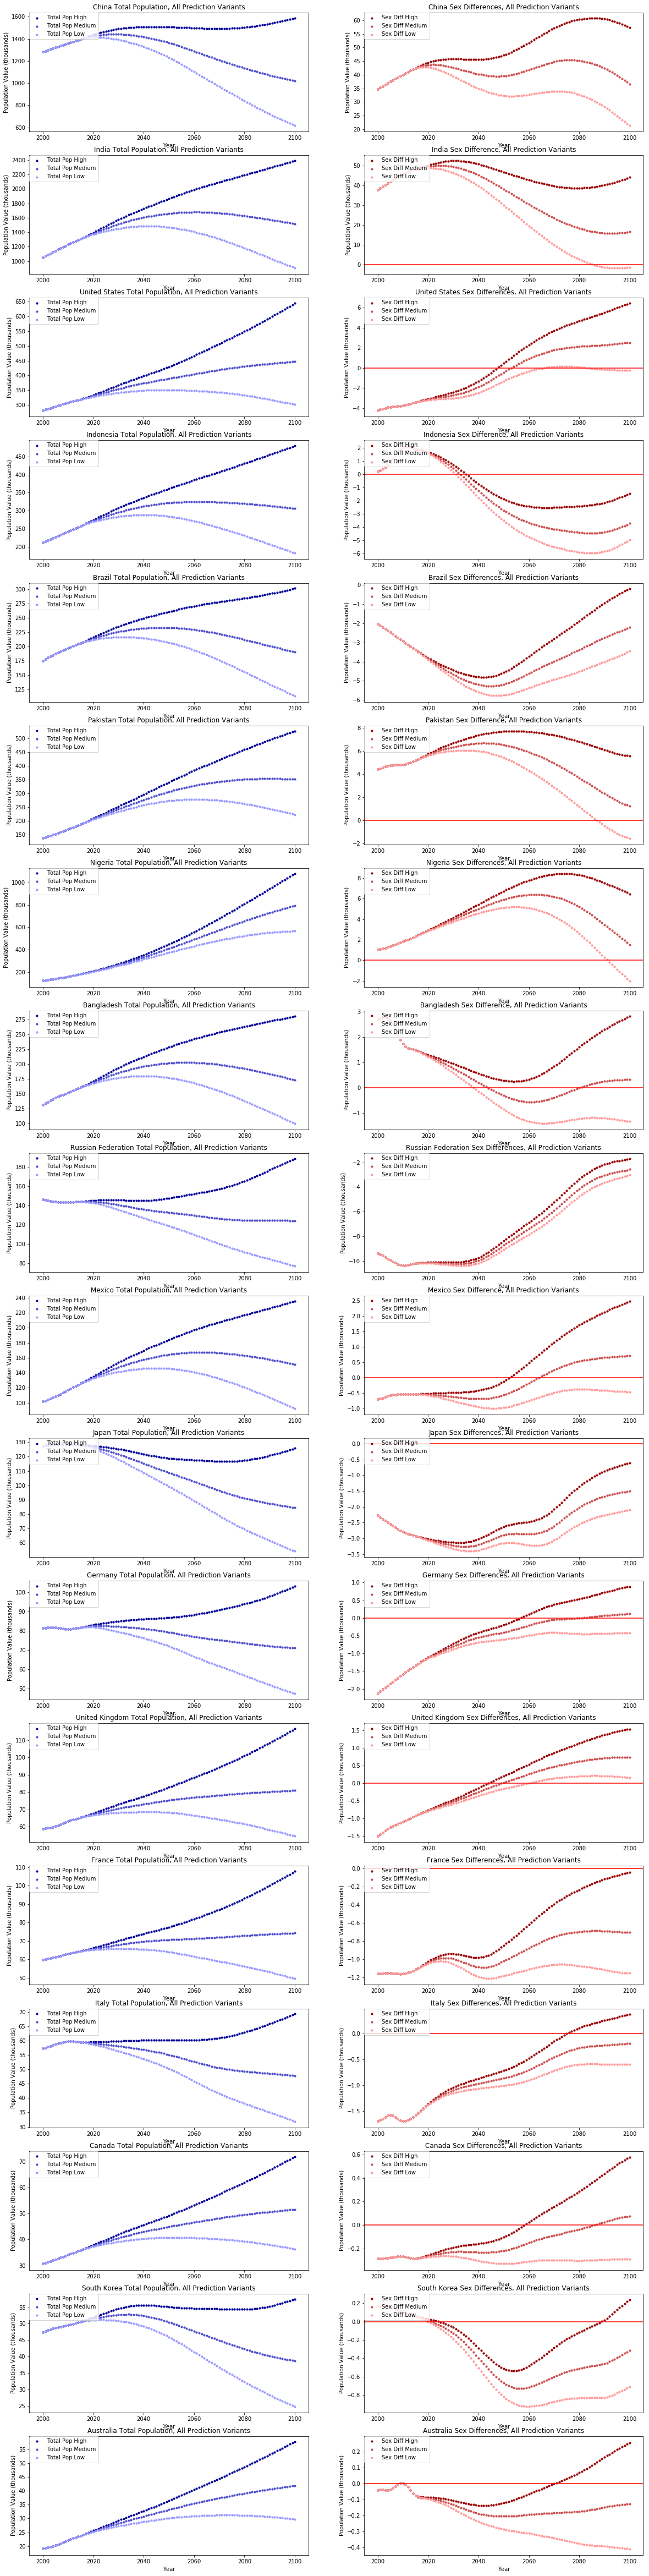

In [35]:
plt.figure(figsize=(20,85))

plt.subplot(18,2,1)
plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('China Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,2)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('China Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)


plt.subplot(18,2,3)
plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('India Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,4)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('India Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,5)
plt.scatter(x=us_pop_high['Year(s)'], y=us_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=us_pop_low['Year(s)'], y=us_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('United States Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,6)
plt.scatter(x=us_pop_m_high['Year(s)'], y=us_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=us_pop_m_med['Year(s)'], y=us_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=us_pop_m_low['Year(s)'], y=us_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('United States Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,7)
plt.scatter(x=indonesia_pop_high['Year(s)'], y=indonesia_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Indonesia Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,8)
plt.scatter(x=indonesia_pop_m_high['Year(s)'], y=indonesia_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=indonesia_pop_m_med['Year(s)'], y=indonesia_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Indonesia Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,9)
plt.scatter(x=brazil_pop_high['Year(s)'], y=brazil_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=brazil_pop_low['Year(s)'], y=brazil_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Brazil Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,10)
plt.scatter(x=brazil_pop_m_high['Year(s)'], y=brazil_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=brazil_pop_m_med['Year(s)'], y=brazil_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=brazil_pop_m_low['Year(s)'], y=brazil_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Brazil Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,11)
plt.scatter(x=paki_pop_high['Year(s)'], y=paki_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Pakistan Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,12)
plt.scatter(x=paki_pop_m_high['Year(s)'], y=paki_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=paki_pop_m_med['Year(s)'], y=paki_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Pakistan Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,13)
plt.scatter(x=nigeria_pop_high['Year(s)'], y=nigeria_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=nigeria_pop_med['Year(s)'], y=nigeria_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=nigeria_pop_low['Year(s)'], y=nigeria_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Nigeria Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,14)
plt.scatter(x=nigeria_pop_m_high['Year(s)'], y=nigeria_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=nigeria_pop_m_med['Year(s)'], y=nigeria_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=nigeria_pop_m_low['Year(s)'], y=nigeria_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Nigeria Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,15)
plt.scatter(x=bang_pop_high['Year(s)'], y=bang_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=bang_pop_med['Year(s)'], y=bang_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Bangladesh Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,16)
plt.scatter(x=bang_pop_m_high['Year(s)'], y=bang_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=bang_pop_m_med['Year(s)'], y=bang_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Bangladesh Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,17)
plt.scatter(x=russia_pop_high['Year(s)'], y=russia_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=russia_pop_med['Year(s)'], y=russia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=russia_pop_low['Year(s)'], y=russia_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Russian Federation Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,18)
plt.scatter(x=russia_pop_m_high['Year(s)'], y=russia_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=russia_pop_m_med['Year(s)'], y=russia_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=russia_pop_m_low['Year(s)'], y=russia_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Russian Federation Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,19)
plt.scatter(x=mexico_pop_high['Year(s)'], y=mexico_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=mexico_pop_med['Year(s)'], y=mexico_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Mexico Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,20)
plt.scatter(x=mexico_pop_m_high['Year(s)'], y=mexico_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=mexico_pop_m_med['Year(s)'], y=mexico_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Mexico Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,21)
plt.scatter(x=japan_pop_high['Year(s)'], y=japan_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=japan_pop_med['Year(s)'], y=japan_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=japan_pop_low['Year(s)'], y=japan_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Japan Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,22)
plt.scatter(x=japan_pop_m_high['Year(s)'], y=japan_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=japan_pop_m_med['Year(s)'], y=japan_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=japan_pop_m_low['Year(s)'], y=japan_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Japan Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,23)
plt.scatter(x=germany_pop_high['Year(s)'], y=germany_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=germany_pop_med['Year(s)'], y=germany_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=germany_pop_low['Year(s)'], y=germany_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Germany Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,24)
plt.scatter(x=germany_pop_m_high['Year(s)'], y=germany_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=germany_pop_m_med['Year(s)'], y=germany_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=germany_pop_m_low['Year(s)'], y=germany_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Germany Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,25)
plt.scatter(x=uk_pop_high['Year(s)'], y=uk_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=uk_pop_med['Year(s)'], y=uk_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=uk_pop_low['Year(s)'], y=uk_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('United Kingdom Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,26)
plt.scatter(x=uk_pop_m_high['Year(s)'], y=uk_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=uk_pop_m_med['Year(s)'], y=uk_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=uk_pop_m_low['Year(s)'], y=uk_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('United Kingdom Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,27)
plt.scatter(x=france_pop_high['Year(s)'], y=france_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=france_pop_med['Year(s)'], y=france_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=france_pop_low['Year(s)'], y=france_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('France Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,28)
plt.scatter(x=france_pop_m_high['Year(s)'], y=france_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=france_pop_m_med['Year(s)'], y=france_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=france_pop_m_low['Year(s)'], y=france_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('France Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,29)
plt.scatter(x=italy_pop_high['Year(s)'], y=italy_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=italy_pop_med['Year(s)'], y=italy_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=italy_pop_low['Year(s)'], y=italy_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Italy Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,30)
plt.scatter(x=italy_pop_m_high['Year(s)'], y=italy_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=italy_pop_m_med['Year(s)'], y=italy_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=italy_pop_m_low['Year(s)'], y=italy_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Italy Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,31)
plt.scatter(x=canada_pop_high['Year(s)'], y=canada_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=canada_pop_med['Year(s)'], y=canada_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=canada_pop_low['Year(s)'], y=canada_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Canada Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,32)
plt.scatter(x=canada_pop_m_high['Year(s)'], y=canada_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=canada_pop_m_med['Year(s)'], y=canada_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=canada_pop_m_low['Year(s)'], y=canada_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Canada Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,33)
plt.scatter(x=skorea_pop_high['Year(s)'], y=skorea_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=skorea_pop_med['Year(s)'], y=skorea_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=skorea_pop_low['Year(s)'], y=skorea_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('South Korea Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,34)
plt.scatter(x=skorea_pop_m_high['Year(s)'], y=skorea_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=skorea_pop_m_med['Year(s)'], y=skorea_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=skorea_pop_m_low['Year(s)'], y=skorea_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('South Korea Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,35)
plt.scatter(x=australia_pop_high['Year(s)'], y=australia_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=australia_pop_med['Year(s)'], y=australia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=australia_pop_low['Year(s)'], y=australia_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Australia Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,36)
plt.scatter(x=australia_pop_m_high['Year(s)'], y=australia_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=australia_pop_m_med['Year(s)'], y=australia_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=australia_pop_m_low['Year(s)'], y=australia_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Australia Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.show()

In mo

When we look at most of the curves, it seems, like a countries population is somewhat informed by it's gender ratio. The 2 noteable exceptions, are both extremely female, the 2 most female by far. Russia also is a special case being the only country whose population begins it's trend in a state of decrease.
In fact, if we graph the population side by side with just the first half or so of the population graphs, we can see that for most countries the population growth curve looks similar to the gender ratio curve.

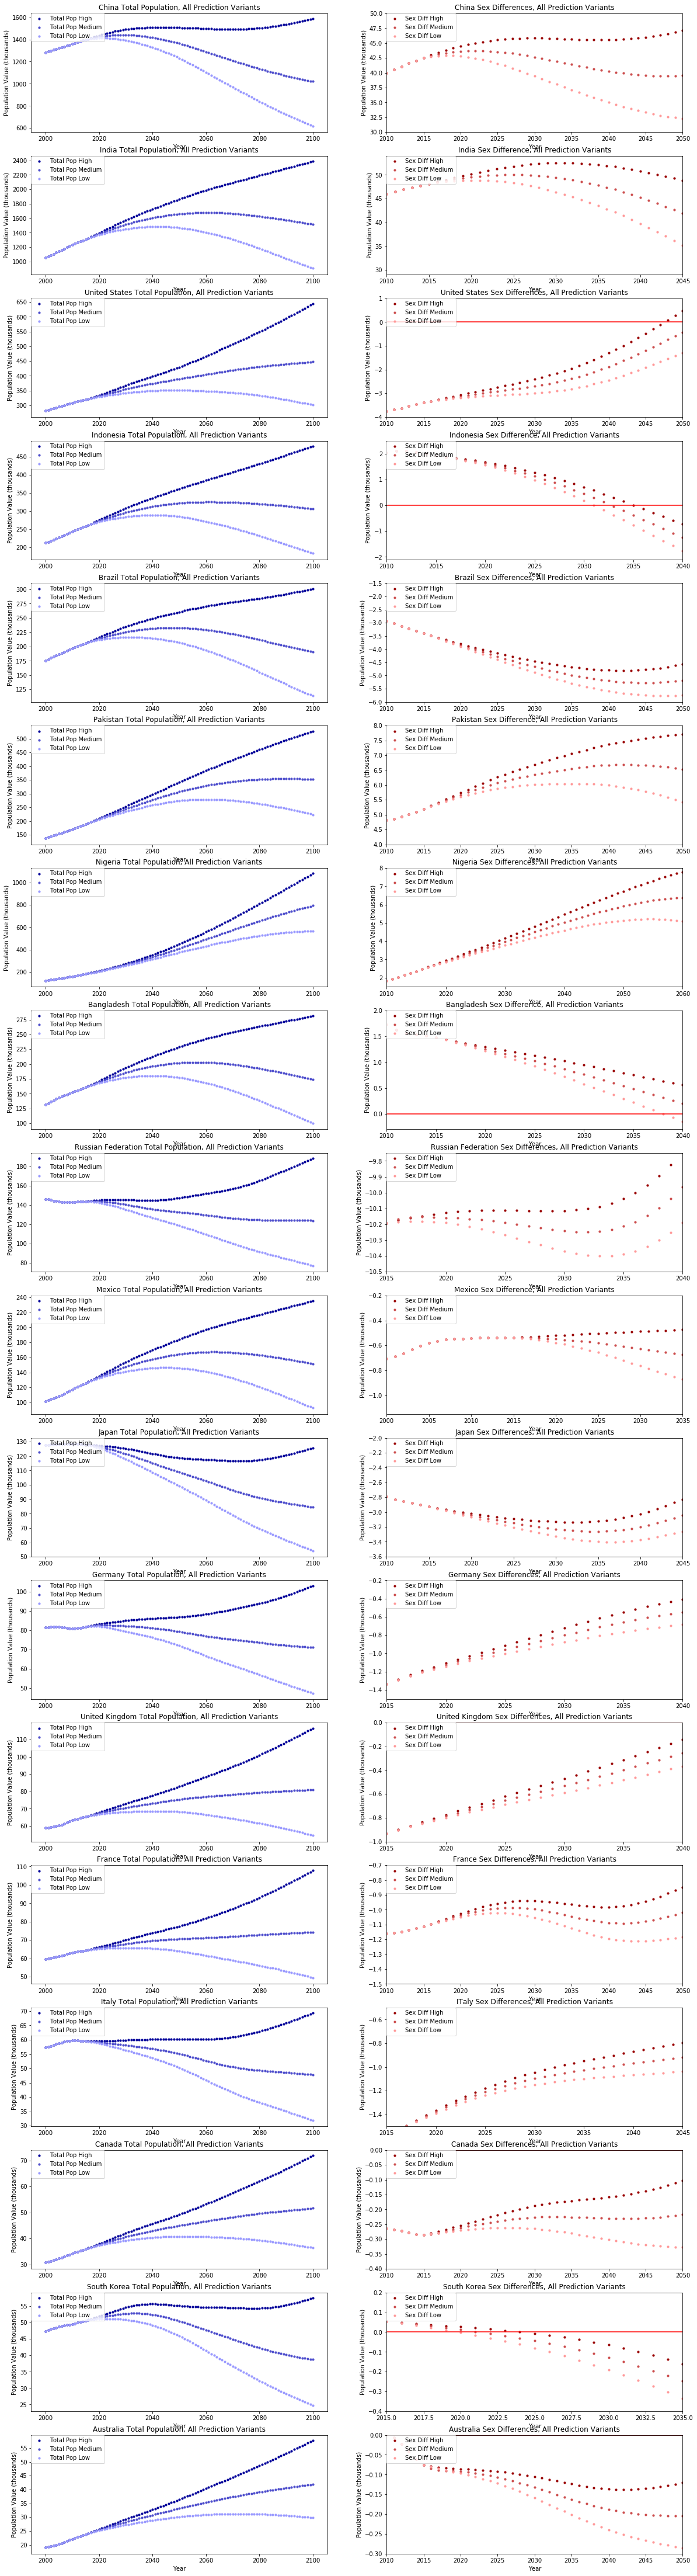

In [46]:
plt.figure(figsize=(20,80))

plt.subplot(18,2,1)
plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('China Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,2)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('China Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(30,50)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)


plt.subplot(18,2,3)
plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('India Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,4)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('India Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2045)
plt.ylim(29,54)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,5)
plt.scatter(x=us_pop_high['Year(s)'], y=us_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=us_pop_low['Year(s)'], y=us_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('United States Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,6)
plt.scatter(x=us_pop_m_high['Year(s)'], y=us_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=us_pop_m_med['Year(s)'], y=us_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=us_pop_m_low['Year(s)'], y=us_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('United States Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(-4,1)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,7)
plt.scatter(x=indonesia_pop_high['Year(s)'], y=indonesia_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Indonesia Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,8)
plt.scatter(x=indonesia_pop_m_high['Year(s)'], y=indonesia_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=indonesia_pop_m_med['Year(s)'], y=indonesia_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Indonesia Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2040)
plt.ylim(-2.1,2.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,9)
plt.scatter(x=brazil_pop_high['Year(s)'], y=brazil_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=brazil_pop_low['Year(s)'], y=brazil_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Brazil Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,10)
plt.scatter(x=brazil_pop_m_high['Year(s)'], y=brazil_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=brazil_pop_m_med['Year(s)'], y=brazil_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=brazil_pop_m_low['Year(s)'], y=brazil_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Brazil Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(-6,-1.5)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,11)
plt.scatter(x=paki_pop_high['Year(s)'], y=paki_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Pakistan Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,12)
plt.scatter(x=paki_pop_m_high['Year(s)'], y=paki_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=paki_pop_m_med['Year(s)'], y=paki_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Pakistan Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(4,8)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,13)
plt.scatter(x=nigeria_pop_high['Year(s)'], y=nigeria_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=nigeria_pop_med['Year(s)'], y=nigeria_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=nigeria_pop_low['Year(s)'], y=nigeria_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Nigeria Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,14)
plt.scatter(x=nigeria_pop_m_high['Year(s)'], y=nigeria_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=nigeria_pop_m_med['Year(s)'], y=nigeria_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=nigeria_pop_m_low['Year(s)'], y=nigeria_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Nigeria Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2060)
plt.ylim(1.5,8)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,15)
plt.scatter(x=bang_pop_high['Year(s)'], y=bang_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=bang_pop_med['Year(s)'], y=bang_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Bangladesh Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,16)
plt.scatter(x=bang_pop_m_high['Year(s)'], y=bang_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=bang_pop_m_med['Year(s)'], y=bang_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Bangladesh Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2040)
plt.ylim(-0.3,2)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,17)
plt.scatter(x=russia_pop_high['Year(s)'], y=russia_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=russia_pop_med['Year(s)'], y=russia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=russia_pop_low['Year(s)'], y=russia_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Russian Federation Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,18)
plt.scatter(x=russia_pop_m_high['Year(s)'], y=russia_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=russia_pop_m_med['Year(s)'], y=russia_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=russia_pop_m_low['Year(s)'], y=russia_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Russian Federation Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2015,2040)
plt.ylim(-10.5,-9.75)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,19)
plt.scatter(x=mexico_pop_high['Year(s)'], y=mexico_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=mexico_pop_med['Year(s)'], y=mexico_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Mexico Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,20)
plt.scatter(x=mexico_pop_m_high['Year(s)'], y=mexico_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=mexico_pop_m_med['Year(s)'], y=mexico_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Mexico Sex Difference, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2000,2035)
plt.ylim(-1.15,-0.2)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,21)
plt.scatter(x=japan_pop_high['Year(s)'], y=japan_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=japan_pop_med['Year(s)'], y=japan_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=japan_pop_low['Year(s)'], y=japan_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Japan Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,22)
plt.scatter(x=japan_pop_m_high['Year(s)'], y=japan_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=japan_pop_m_med['Year(s)'], y=japan_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=japan_pop_m_low['Year(s)'], y=japan_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Japan Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2041)
plt.ylim(-3.6,-2.6)
#plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,23)
plt.scatter(x=germany_pop_high['Year(s)'], y=germany_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=germany_pop_med['Year(s)'], y=germany_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=germany_pop_low['Year(s)'], y=germany_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Germany Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,24)
plt.scatter(x=germany_pop_m_high['Year(s)'], y=germany_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=germany_pop_m_med['Year(s)'], y=germany_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=germany_pop_m_low['Year(s)'], y=germany_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Germany Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2015,2040)
plt.ylim(-1.5,-0.2)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,25)
plt.scatter(x=uk_pop_high['Year(s)'], y=uk_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=uk_pop_med['Year(s)'], y=uk_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=uk_pop_low['Year(s)'], y=uk_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('United Kingdom Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,26)
plt.scatter(x=uk_pop_m_high['Year(s)'], y=uk_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=uk_pop_m_med['Year(s)'], y=uk_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=uk_pop_m_low['Year(s)'], y=uk_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('United Kingdom Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2015,2040)
plt.ylim(-1,0)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,27)
plt.scatter(x=france_pop_high['Year(s)'], y=france_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=france_pop_med['Year(s)'], y=france_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=france_pop_low['Year(s)'], y=france_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('France Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,28)
plt.scatter(x=france_pop_m_high['Year(s)'], y=france_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=france_pop_m_med['Year(s)'], y=france_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=france_pop_m_low['Year(s)'], y=france_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('France Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(-1.5,-0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,29)
plt.scatter(x=italy_pop_high['Year(s)'], y=italy_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=italy_pop_med['Year(s)'], y=italy_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=italy_pop_low['Year(s)'], y=italy_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Italy Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,30)
plt.scatter(x=italy_pop_m_high['Year(s)'], y=italy_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=italy_pop_m_med['Year(s)'], y=italy_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=italy_pop_m_low['Year(s)'], y=italy_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('ITaly Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2015,2045)
plt.ylim(-1.5,-0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,31)
plt.scatter(x=canada_pop_high['Year(s)'], y=canada_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=canada_pop_med['Year(s)'], y=canada_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=canada_pop_low['Year(s)'], y=canada_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Canada Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,32)
plt.scatter(x=canada_pop_m_high['Year(s)'], y=canada_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=canada_pop_m_med['Year(s)'], y=canada_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=canada_pop_m_low['Year(s)'], y=canada_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Canada Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(-0.4,0)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,33)
plt.scatter(x=skorea_pop_high['Year(s)'], y=skorea_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=skorea_pop_med['Year(s)'], y=skorea_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=skorea_pop_low['Year(s)'], y=skorea_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('South Korea Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,34)
plt.scatter(x=skorea_pop_m_high['Year(s)'], y=skorea_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=skorea_pop_m_med['Year(s)'], y=skorea_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=skorea_pop_m_low['Year(s)'], y=skorea_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('South Korea Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2015,2035)
plt.ylim(-0.4,0.2)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,35)
plt.scatter(x=australia_pop_high['Year(s)'], y=australia_pop_high['Value']/1000,color=(0.0,0.0,0.6), label='Total Pop High', s=10) 
plt.scatter(x=australia_pop_med['Year(s)'], y=australia_pop_med['Value']/1000,color=(0.3,0.3,0.8), label='Total Pop Medium',s=10) 
plt.scatter(x=australia_pop_low['Year(s)'], y=australia_pop_low['Value']/1000,color=(0.6,0.6,1.0), label='Total Pop Low',s=10)
plt.title('Australia Total Population, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(18,2,36)
plt.scatter(x=australia_pop_m_high['Year(s)'], y=australia_pop_m_high['Difference']/1000,color=(0.6,0.0,0.0), label='Sex Diff High', s=10) 
plt.scatter(x=australia_pop_m_med['Year(s)'], y=australia_pop_m_med['Difference']/1000,color=(0.8,0.3,0.3), label='Sex Diff Medium', s=10) 
plt.scatter(x=australia_pop_m_low['Year(s)'], y=australia_pop_m_low['Difference']/1000,color=(1.0,0.6,0.6), label='Sex Diff Low', s=10) 
plt.title('Australia Sex Differences, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.xlim(2010,2050)
plt.ylim(-0.3,0)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.show()

We can really see now how the population curve mimics the sex ratio curve for most countries.
With this relation and the fact that all countries have a male sex male act as conducive to population growth, we can pretty confidantly say that there is some relation between gender ratio and population growth.
We also saw in Brazil, Russia, France, and Australia that societies which are heavily female tend to grow their population in a more unpredictable way.


We now know that the sex ratio seems to inform the population growth, meaning that the explaination probably involves the way that men and women interact in their respective society.
Though because all countires seem to have a male ratio be more conducive for growth, the reason must be somewhat innate to human nature.
Perhaps men initiate more out of relationship, unprotected sex, so a society with more men will naturally have more pregnancies.
Or perhaps most women do not feel comfortable having children out of a relatioship, so the more male society is the single men will be availible.
We would need to do more research and analysis to find the exact reason, and we simply do not have the time. 

For now, let's just feel good knowing that we showed that there is a link betwene sex ratio and population growth.

## References

World Population Prospects: The 2017 Revision
Downloaded from:

data.un.org/Data.aspx?d=PopDiv&f=variableID%3a12

data.un.org/Data.aspx?d=PopDiv&f=variableID%3a10

data.un.org/Data.aspx?d=PopDiv&f=variableID%3a11

on April 12, 2018